Thylane CORREGE, MONO 1 B, 21232962

# CC n°1: Une particule dans un cyclotron

Un cyclotron comporte trois parties, voir la figure ci-dessous. Les parties supérieure et inférieure, appelées "D" à cause de la forme de la trajectoire, sont plongées dans un champ magnétique.

![](Figure3.png)

Au temps $t_0=0$ **(ici le temps est sans unité)**, un proton est injecté au niveau du D inférieur sans vitesse. Une tension alternative est appliquée entre les D. Elle crée un champ électrique dont la direction et le sens sont toujours **similaires** à ceux de la vitesse du proton lorsqu’il est entre les D. Les instants $t_n$ où le proton sort des D (soit inférieur, soit supérieur, voir la figure) sont donnés, **sans unité**, par
$$t_n=n+\tau \sqrt{n}.$$
On choisit $\tau=0.5$. Le temps passé par le proton dans un D (supérieur ou inférieur) est toujours de $1$.
La trajectoire du proton est plane. On s’intéresse à sa vitesse. Ses composantes sont données, dans un repère et des unités appropriés, **en fonction de sa position dans le cyclotron:**
1) Pour $t$ variant de $t_n$ à $t_{n+1}-1$ c’est-à-dire quand il est entre les D :
$$
v_x(t) = 0  \qquad  v_y(t) = \epsilon_n \left( \sqrt{n} + (t-t_n)/\tau \right)
$$
2) Pour $t$ variant de $t_{n+1}-1$ à $t_{n+1}$ c’est-à-dire quand il est dans D supérieur ou D inférieur.
$$
v_x(t) = \epsilon_n \sqrt{n+1} \sin \left( \pi (t-t_{n+1}) \right) \qquad v_y(t) = -\epsilon_n \sqrt{n+1} \cos \left( \pi (t-t_{n+1}) \right)
$$

Dans ces expressions, $\epsilon_n$ vaut $1$ pour $n$ pair et $-1$ pour $n$ impair. On pourra prendre $\epsilon_n = (-1)^n$.

Premièrement, on importe les modules de python qui vont nous être utiles.

In [25]:
import matplotlib.pyplot as plt
import numpy as np

On initialise aussi les données dont nous avons besoin.

In [26]:
tau = 0.5 # sans unité
t0 = 0 # sans unité

## Partie 1

Dans cette première partie, nous nous intéressons à la vitesse de notre particule dans le cyclotrons que lors du temps passé dans un D.

On crée le tableau de valeur de $t_n$ de $t_0$ à $t_{50}$ inclus.

In [27]:
T = np.linspace(0,50,51) # tableau des entiers de 0 à 50 inclus
tn = T + tau*np.sqrt(T) # calcul des valeurs recherchées

On vérifie que les valeurs de $t_n$ sont bien les valeurs que l'on recherche pour certaines valeurs de notre tableau à l'aide d'un opérateur booléen.

In [28]:
if tn[1] == 1.5:
    print("t1 vaut bien " + str(tn[1]))
if tn[4] == 5:
    print("t4 vaut bien " + str(tn[4]))
if tn[9] == 10.5:
    print("t9 vaut bien " + str(tn[9]))
if tn[16] == 18:
    print("t16 vaut bien " + str(tn[16]))
if tn[25] == 27.5:
    print("t25 vaut bien " + str(tn[25]))

t1 vaut bien 1.5
t4 vaut bien 5.0
t9 vaut bien 10.5
t16 vaut bien 18.0
t25 vaut bien 27.5


On va coder les fonctions $v_x(t)$ et $v_y(t)$. Nous allons ensuite calculer ces vitesses pour des temps compris entre $t_2\,-\,1$ et $t_2$, et les afficher dans un graphique.

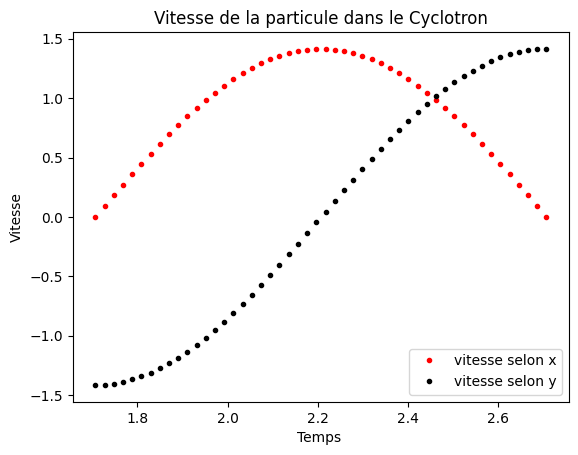

In [29]:
# initilisation du tableau des temps
temps_2 = np.linspace(tn[2]-1,tn[2],50) # on prend 50 valeurs

# fonctions vitesse
def vx(t: np.array, n: int): 
    """vitesse selon x entre t_n+1 - 1 et t_n+1, il faudra juste faire attention aux indices"""
    return ((-1) ** n) * np.sqrt(n+1) * np.sin(np.pi * (t - tn[n+1]))

def vy(t: np.array, n: int): 
    """vitesse selon y entre t_n+1 - 1 et t_n+1"""
    return ((-1) ** (n+1)) * np.sqrt(n+1) * np.cos(np.pi * (t - tn[n+1]))

# Calcul de ces vitesses pour les temps que l'on a choisi
vx_2 = vx(temps_2, 1) # je ne met pas 2 pour n car on calcule pour n+1
vy_2 = vy(temps_2, 1)

# On plot ces vitesses dans un graphique 
plt.plot(temps_2, vx_2, '.r', label = 'vitesse selon x')
plt.plot(temps_2, vy_2, '.k', label = 'vitesse selon y')
plt.title("Vitesse de la particule dans le Cyclotron")
plt.ylabel("Vitesse") # pas d'unité puisqu'il n'y en a aucune pour les temps ici
plt.xlabel("Temps ")
plt.legend()

On fait de même entre $t_4\,-\,1$ et $t_4$.

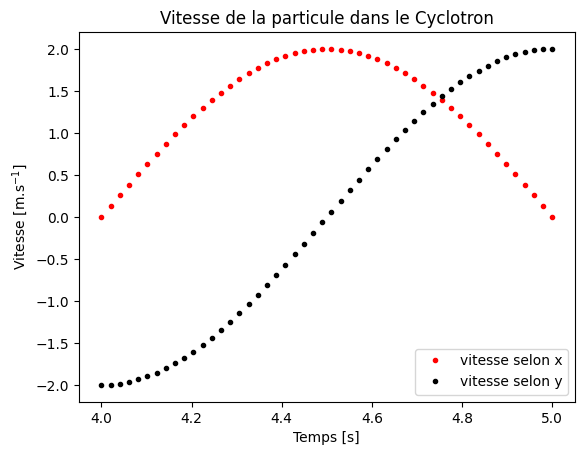

In [30]:
# initilisation du tableau des temps
temps_4 = np.linspace(tn[4]-1,tn[4],50) # on prend 50 valeurs

# Calcul des vitesses 
vx_4 = vx(temps_4, 3) 
vy_4 = vy(temps_4, 3)

# On plot ces vitesses dans un graphique 
plt.plot(temps_4, vx_4, '.r', label = 'vitesse selon x')
plt.plot(temps_4, vy_4, '.k', label = 'vitesse selon y')
plt.title("Vitesse de la particule dans le Cyclotron")
plt.ylabel("Vitesse [m.s$^{-1}$]")
plt.xlabel("Temps [s]")
plt.legend()

On remarque que les valeurs maximales pour les vitesses en x et en y sont les mêmes (elles ne sont juste pas atteintes au même moment). Pour les temps entre $t_2\,-\,1$ et $t_2$, la valeur maximale est d'environ $1,5$ tandis que pour les temps entre $t_4\,-\,1$ et $t_4$, la valeur maximale est de $2$. Ainsi, **plus le temps passe, plus notre particule est accélérée dans le cyclotron**.

## Partie 2

Dans cette partie, nous nous intéressons à la vitesse de notre particule dans l'entièreté du cyclotrons, entre $t_0$ et $t_6$.

Nous allons donc devoir tout d'abord coder les fonctions des vitesses pour les temps entre $t_n$ et $t_{n+1}\,-\,1$, et bien redéfinir nos fonctions vitesses précédentes pour pas qu'il y ai de confusions.

In [40]:
def vx_D(t: np.array, n: int): 
    """vitesse selon x entre t_n+1 - 1 et t_n+1, dans le D supérieur ou inférieur"""
    return ((-1) ** n) * np.sqrt(n+1) * np.sin(np.pi * (t - tn[n+1]))

def vy_D(t: np.array, n: int): 
    """vitesse selon y entre t_n+1 - 1 et t_n+1, dans le D supérieur ou inférieur"""
    return ((-1) ** (n+1)) * np.sqrt(n+1) * np.cos(np.pi * (t - tn[n+1]))

def vx_horsD(t: np.array, n: int):
    """vitesse selon x entre t_n et t_n+1 -1, entre les D"""
    return np.zeros(np.size(t))

def vy_horsD(t: np.array, n: int):
    """vitesse selon y entre t_n et t_n+1 -1, entre les D"""
    return ((-1) ** n) * (np.sqrt(n) + (t - tn[n]) / tau)

Nous allons désormais calculer ces vitesses et les afficher dans un graphique.

ValueError: x and y must have same first dimension, but have shapes (620,) and (40,)

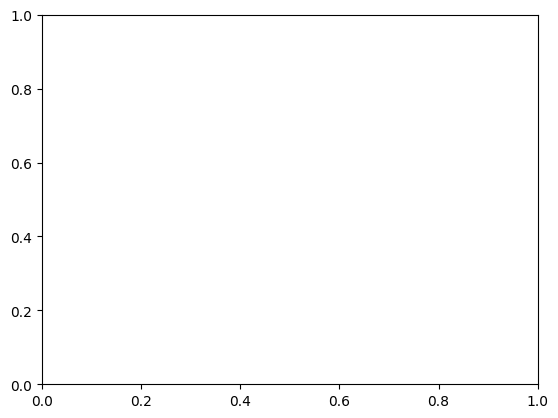

In [46]:
# On initialise, on calcule deja entre t0 et t1

# entre les D
t_horsD_0 = np.linspace(tn[0], tn[1]-1,10)
vx_horsD_0 = vx_horsD(t_horsD_0, 0)
vy_horsD_0 = vy_horsD(t_horsD_0, 0)

# dans le D inférieur ou supérieur
t_D_0 = np.linspace(tn[1]-1, tn[1],10)
vx_D_0 = vx_D(t_D_0, 0)
vy_D_0 = vy_D(t_D_0, 0)

# On concatene
t = np.concatenate((t_horsD_0,t_D_0), axis = 0)
vx = np.concatenate((vx_horsD_0,vx_D_0), axis = 0)
vy = np.concatenate((vy_horsD_0,vy_D_0), axis = 0)

# On calcule le reste
for i in range (1,7): # le 7 est exclus
    t_horsD_0 = np.linspace(tn[i], tn[i]-1)
    vx_horsD_0 = vx_horsD(t_horsD_0, i)
    vx_horsD_0 = vx_horsD(t_horsD_0, i)

    t_D_0 = np.linspace(tn[i]-1, tn[i])
    vx_D_0 = vx_D(t_D_0, i)
    vx_D_0 = vx_D(t_D_0, i)

    t0 = np.concatenate((t_horsD_0,t_D_0), axis = 0)
    vx0 = np.concatenate((vx_horsD_0,vx_D_0), axis = 0)
    vy0 = np.concatenate((vy_horsD_0,vy_D_0), axis = 0)
    
    # On concatene le pécédent avec celui que l'on vient d'obtenir
    t = np.concatenate((t,t0), axis = 0)
    vx = np.concatenate((vx,vx0), axis = 0)
    vx = np.concatenate((vy,vy0), axis = 0)
    
    
# on plot ces tableaux
plt.plot(t, vx, '.r', label = 'vitesse selon x')
plt.plot(t, vy, '.k', label = 'vitesse selon y')
plt.title("Vitesse de la particule dans le Cyclotron")
plt.ylabel("Vitesse [m.s$^{-1}$]")
plt.xlabel("Temps [s]")
plt.legend()